In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [3]:
#análise exploratória

df.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,3.935824,3.201149,3.156130,4.434866,11.341954
std,1.239975,0.731727,0.834353,0.933401,1.031507,1.152575,6.210017,3.864796
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [4]:
#qtd nulos
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

In [5]:
#correlação entre variáveis explicativas e variável target
df.corr()['G3']

#ao observar apenas o coeficiente de correlação entre as variáveis, se pode dizer que o tempo de estudo é o que mais influencia 
#na variável target, seguido pela variável que se refere a qualidade da relação familiar. Se pode dizer que são dois fatores 
#que vem à nossa mente quando se trata de quais fatores poderiam influenciar positivamente ou não na média de estudantes. 

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

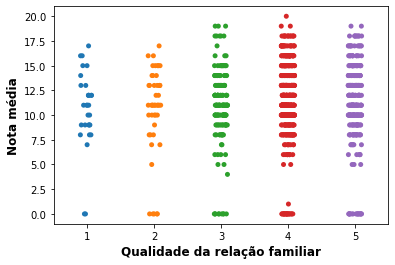

In [6]:
import seaborn as sns

#dispersão entre qualidade da relação familiar e nota média
#famrel -> 1 - muito ruim a 5 - muito boa

sns.stripplot(x='famrel', y='G3', data=df)
plt.xlabel("Qualidade da relação familiar", fontsize = 12, fontweight = 'bold')
plt.ylabel("Nota média", fontsize = 12, fontweight = 'bold')
plt.show()

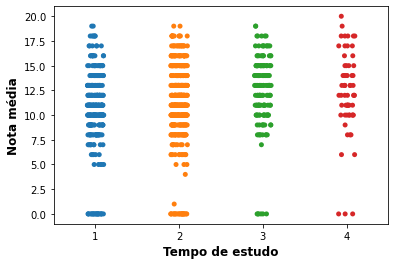

In [7]:
#dispersão entre nota média e tempo de estudo semanal
#1 - <2 horas 
#2 - 2 a 5 horas 
#3 - 5 a 10 horas
#4 - >10 horas

sns.stripplot(x='studytime', y='G3', data=df)
plt.xlabel("Tempo de estudo", fontsize = 12, fontweight = 'bold')
plt.ylabel("Nota média", fontsize = 12, fontweight = 'bold')
plt.show()

In [8]:
#observando os dados e os gráficos vemos que a qualidade da relação familiar parece influenciar na nota média do aluno 
#de forma fraca, assim como o tempo de estudo, embora este último ter maior influência na variável target. 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm_exp = LinearRegression()

In [11]:
X = df.studytime.values.reshape(-1,1)
y = df.G3.values

lm_exp.fit(X, y)

LinearRegression()

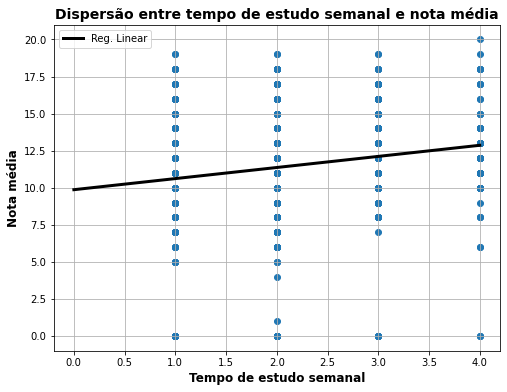

In [12]:
plt.figure(figsize=[8,6])
plt.scatter(df.studytime, df.G3)
plt.title("Dispersão entre tempo de estudo semanal e nota média", fontsize = 14, fontweight = 'bold')
plt.xlabel("Tempo de estudo semanal", fontsize = 12, fontweight = 'bold')
plt.ylabel("Nota média", fontsize = 12, fontweight = 'bold')
plt.grid()

#inserindo a reta da regressão linear
xlims = np.arange(0,5)
plt.plot(xlims, lm_exp.predict(xlims.reshape(-1,1)), c = 'black', lw = 3, label = 'Reg. Linear')
plt.legend()
plt.show()

In [13]:
#pré-processamento dos dados

#importando a função
from sklearn.model_selection import train_test_split

In [14]:
#dados de teste(25%) e treino

dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


In [15]:
#OHE
from sklearn.preprocessing import OneHotEncoder

#normalização dos dados
from sklearn.preprocessing import StandardScaler

In [16]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()

    #retirando valores faltantes
    dff = dff.dropna(axis = 0)
    
    variaveis_para_normalizar = ['age', 
                                 'traveltime', 
                                 'studytime', 
                                 'famrel', 
                                 'freetime', 
                                 'goout', 
                                 'absences']
    
    cols_encoder = ['sex', 
                    'famsize', 
                    'Pstatus', 
                    'schoolsup', 
                    'famsup', 
                    'paid', 
                    'activities', 
                    'internet', 
                    'romantic']
    

    if dataset_de_treino:  
        
        #OHE
        encoder = OneHotEncoder()
        df_ohe = pd.DataFrame(encoder.fit_transform(dff[cols_encoder]).toarray(), columns=encoder.get_feature_names())

        #normalização
        sc = StandardScaler()
        df_ss = pd.DataFrame(sc.fit_transform(dff[variaveis_para_normalizar]), columns=[x+'_norm' for x in variaveis_para_normalizar])
        
        X, y =  np.c_[df_ohe, df_ss], dff.G3.values
        return X, y, encoder, sc
    
    else:
        #OHE
        df_ohe = cat_encoder.transform(dff[cols_encoder]).toarray()
        
        #normalização
        df_ss = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_ohe, df_ss], dff.G3.values
        return X, y

In [17]:
Xtrain, ytrain, encoder_train, scaler_train  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)

In [18]:
Xtrain.shape, ytrain.shape, dftrain.shape

((783, 25), (783,), (783, 17))

In [19]:
Xtest, ytest = preprocessamento_completo(df = dftest, 
                                         dataset_de_treino = False, 
                                         cat_encoder = encoder_train, 
                                         std_scaler = scaler_train)

In [20]:
Xtest.shape, ytest.shape, dftest.shape

((261, 25), (261,), (261, 17))

In [21]:
#testando modelos

#importando algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [23]:
#instanciando a regressão linear
lin_reg = LinearRegression()
#fitando dados de treino
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [24]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

3.8350446605862274

In [25]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.10005909608573449

In [26]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:1.02 / R2: 0.94
K = 2 | RMSE:2.68 / R2: 0.56
K = 5 | RMSE:3.35 / R2: 0.31
K = 10 | RMSE:3.6 / R2: 0.2
K = 20 | RMSE:3.74 / R2: 0.14
K = 50 | RMSE:3.85 / R2: 0.1


In [27]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.62 / R2: 0.2
Profundidade da árvore = 10 | RMSE:2.28 / R2: 0.68
Profundidade da árvore = 100 | RMSE:0.72 / R2: 0.97


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

#regressão linear está overfittando os dados

[0.02937724 0.07793787 0.08735352 0.02453609 0.06464084]
media:  0.05676911293909472
desvio padrão:  0.025435288596958445


In [30]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

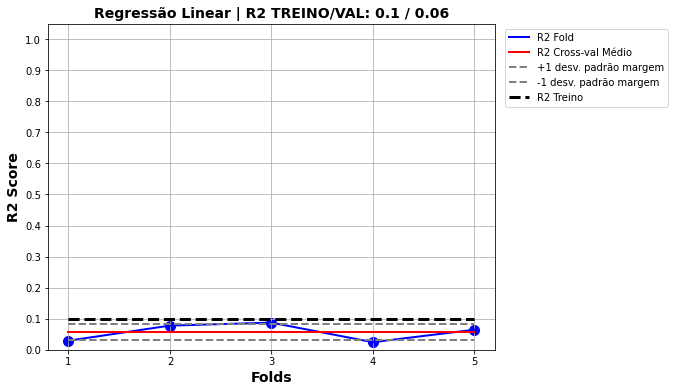

In [31]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

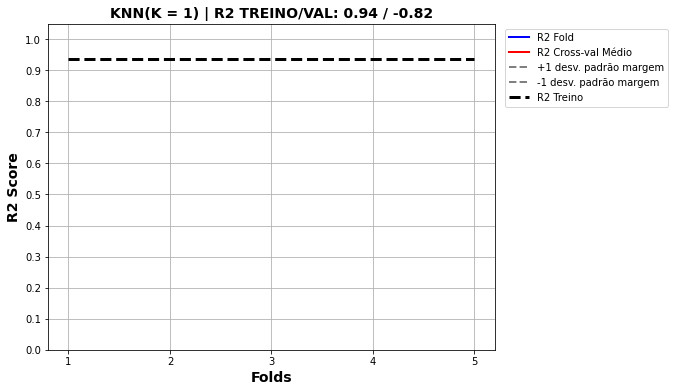

In [32]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

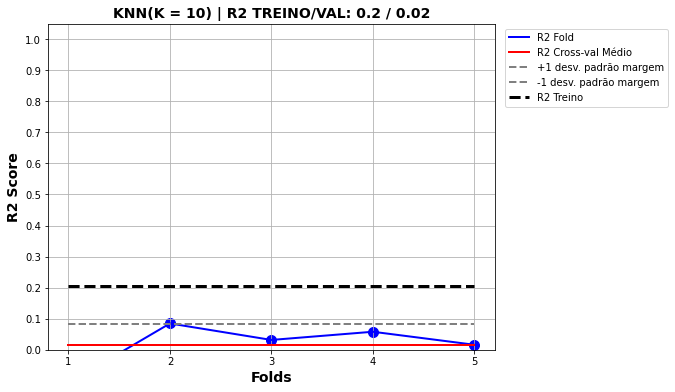

In [33]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

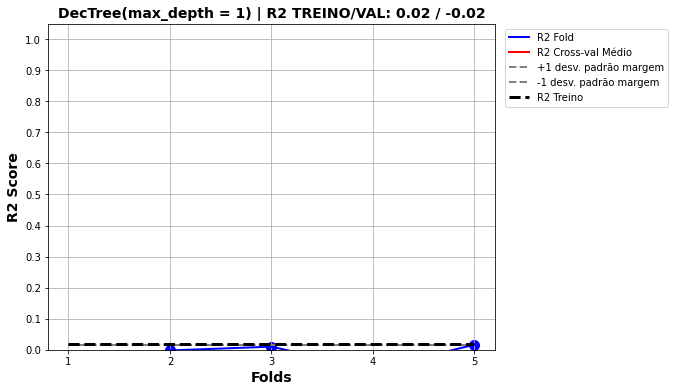

In [34]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

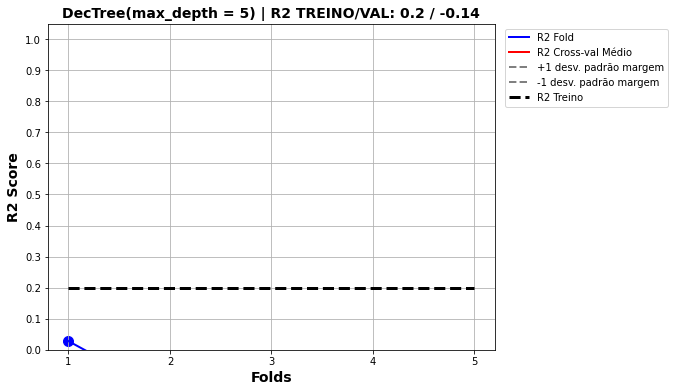

In [35]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

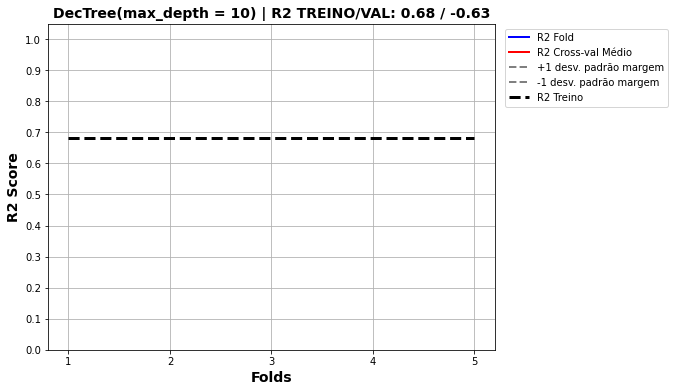

In [36]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

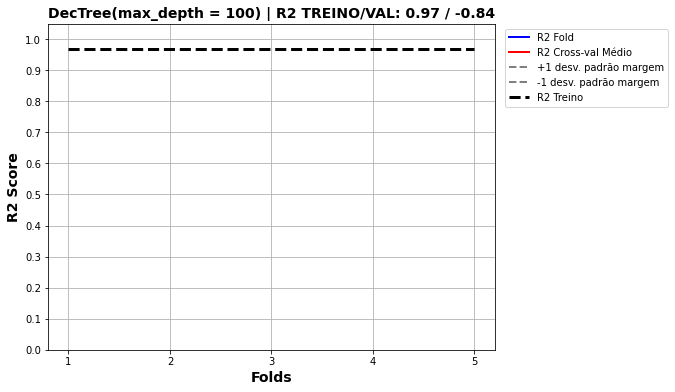

In [37]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

In [38]:
modelo_final = KNeighborsRegressor(n_neighbors = 10)
modelo_final.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=10)

In [39]:
preds_modelo_final = modelo_final.predict(Xtest)

In [40]:
#R2 em teste
r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.12910695484283197

In [41]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

3.0338006460796425

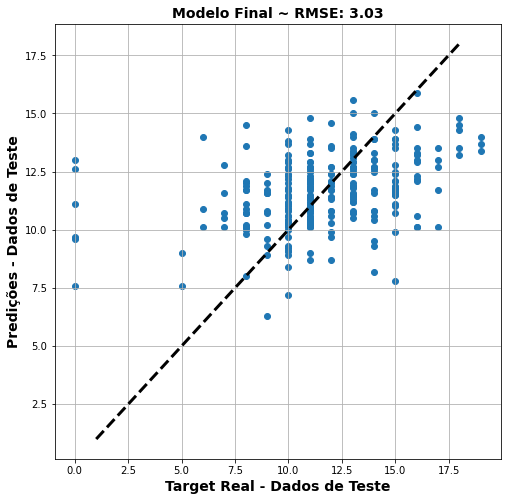

In [42]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

In [43]:
#conclusão
#o R2 em teste mostra que de fato o modelo está sofrendo de overfitting.
#a dispersão dos dados no gráfico acima mostra que apesar do padrão linear entre predições e target real, o modelo 
#sofre alguns erros e portanto este modelo não está fazendo um bom trabalho. 